In [1]:
import os
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg


MUESTRA ALEATORIA DEL CONJUNTO: TRAIN


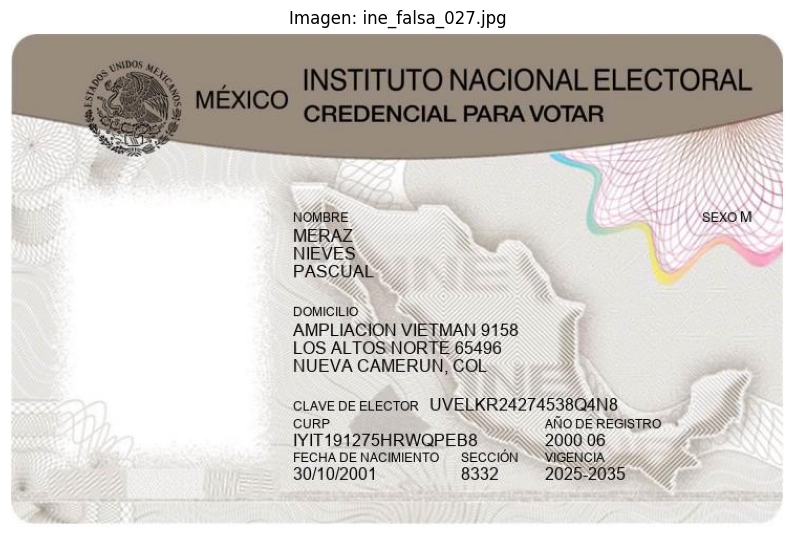


Datos del metadata.jsonl:
  nombre: PASCUAL
  segundo_nombre: 
  apellido_paterno: MERAZ
  apellido_materno: NIEVES
  clave_elector: UVELKR24274538Q4N8
  curp: IYIT191275HRWQPEB8
  fecha_nacimiento: 30/10/2001
  sexo: M
  seccion: 8332
  vigencia_inicio: 2025
  vigencia_fin: 2035
  ano_registro: 2000
  mes_registro: 06
  direccion1: AMPLIACION VIETMAN 9158
  direccion2: LOS ALTOS NORTE 65496
  direccion3: NUEVA CAMERUN, COL
  calle: AMPLIACION VIETMAN
  numero_ext: 9158
  numero_int: 
  colonia: LOS ALTOS NORTE
  codigo_postal: 65496
  municipio: NUEVA CAMERUN
  estado: COL

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_027.jpg
  Nombre: PASCUAL
  Segundo Nombre: nan
  Apellido Paterno: MERAZ
  Apellido Materno: NIEVES
  Estado: COL
  Municipio: NUEVA CAMERUN
  Colonia: LOS ALTOS NORTE
  Calle: AMPLIACION VIETMAN
  Numero Ext.: 9158
  Numero Int.: nan
  Codigo Postal: 65496
  CURP: IYIT191275HRWQPEB8
  Clave Elector: UVELKR24274538Q4N8
  Fecha de Nacimiento: 30/10/2001
  Seccion: 8

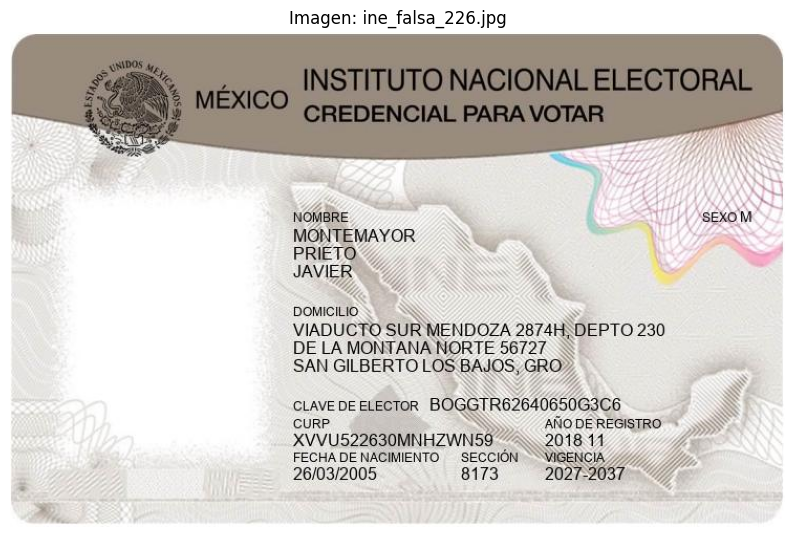


Datos del metadata.jsonl:
  nombre: JAVIER
  segundo_nombre: 
  apellido_paterno: MONTEMAYOR
  apellido_materno: PRIETO
  clave_elector: BOGGTR62640650G3C6
  curp: XVVU522630MNHZWN59
  fecha_nacimiento: 26/03/2005
  sexo: M
  seccion: 8173
  vigencia_inicio: 2027
  vigencia_fin: 2037
  ano_registro: 2018
  mes_registro: 11
  direccion1: VIADUCTO SUR MENDOZA 2874H, DEPTO 230
  direccion2: DE LA MONTANA NORTE 56727
  direccion3: SAN GILBERTO LOS BAJOS, GRO
  calle: VIADUCTO SUR MENDOZA
  numero_ext: 2874H
  numero_int: DEPTO 230
  colonia: DE LA MONTANA NORTE
  codigo_postal: 56727
  municipio: SAN GILBERTO LOS BAJOS
  estado: GRO

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_226.jpg
  Nombre: JAVIER
  Segundo Nombre: nan
  Apellido Paterno: MONTEMAYOR
  Apellido Materno: PRIETO
  Estado: GRO
  Municipio: SAN GILBERTO LOS BAJOS
  Colonia: DE LA MONTANA NORTE
  Calle: VIADUCTO SUR MENDOZA
  Numero Ext.: 2874H
  Numero Int.: DEPTO 230
  Codigo Postal: 56727
  CURP: XVVU522630MNHZWN59


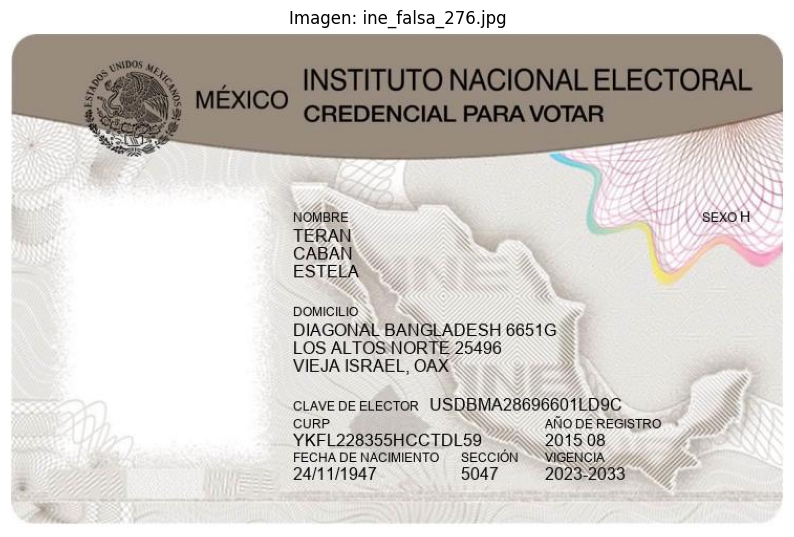


Datos del metadata.jsonl:
  nombre: ESTELA
  segundo_nombre: 
  apellido_paterno: TERAN
  apellido_materno: CABAN
  clave_elector: USDBMA28696601LD9C
  curp: YKFL228355HCCTDL59
  fecha_nacimiento: 24/11/1947
  sexo: H
  seccion: 5047
  vigencia_inicio: 2023
  vigencia_fin: 2033
  ano_registro: 2015
  mes_registro: 08
  direccion1: DIAGONAL BANGLADESH 6651G
  direccion2: LOS ALTOS NORTE 25496
  direccion3: VIEJA ISRAEL, OAX
  calle: DIAGONAL BANGLADESH
  numero_ext: 6651G
  numero_int: 
  colonia: LOS ALTOS NORTE
  codigo_postal: 25496
  municipio: VIEJA ISRAEL
  estado: OAX

Datos del DataFrame:
  Archivo_Imagen: ine_falsa_276.jpg
  Nombre: ESTELA
  Segundo Nombre: nan
  Apellido Paterno: TERAN
  Apellido Materno: CABAN
  Estado: OAX
  Municipio: VIEJA ISRAEL
  Colonia: LOS ALTOS NORTE
  Calle: DIAGONAL BANGLADESH
  Numero Ext.: 6651G
  Numero Int.: nan
  Codigo Postal: 25496
  CURP: YKFL228355HCCTDL59
  Clave Elector: USDBMA28696601LD9C
  Fecha de Nacimiento: 24/11/1947
  Seccion: 50

In [2]:
def visualizar_muestras():
    """
    Selecciona y muestra una imagen aleatoria de cada conjunto (train, val, test) 
    junto con sus datos correspondientes del archivo metadata.jsonl y el DataFrame.
    """
    # Definir rutas
    BASE_DIR = r"C:\Users\Adrian\Desktop\inesdataset"
    SETS_DIR = os.path.join(BASE_DIR, "sets")
    
    # Cargar el DataFrame con todos los datos
    ruta_csv = os.path.join(BASE_DIR, "datos_ines.csv")
    df = pd.read_csv(ruta_csv)
    
    # Para cada conjunto (train, val, test)
    for conjunto in ["train", "validation", "test"]:
        print(f"\n{'='*50}")
        print(f"MUESTRA ALEATORIA DEL CONJUNTO: {conjunto.upper()}")
        print(f"{'='*50}")
        
        # Ruta del conjunto
        carpeta = os.path.join(SETS_DIR, conjunto)
        
        # Buscar archivos de imagen en la carpeta
        archivos_imagen = [f for f in os.listdir(carpeta) 
                          if f.endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(os.path.join(carpeta, f))]
        
        if not archivos_imagen:
            print(f"No se encontraron imágenes en la carpeta {conjunto}.")
            continue
        
        # Seleccionar un archivo aleatorio
        archivo_aleatorio = random.choice(archivos_imagen)
        
        # Ruta completa de la imagen
        ruta_imagen = os.path.join(carpeta, archivo_aleatorio)
        
        # Cargar metadata.jsonl
        metadata_path = os.path.join(carpeta, "metadata.jsonl")
        datos_metadata = None
        
        if os.path.exists(metadata_path):
            with open(metadata_path, 'r', encoding='utf-8') as f:
                for linea in f:
                    datos = json.loads(linea)
                    if datos["file_name"] == archivo_aleatorio:
                        datos_metadata = datos
                        break
        
        # Buscar en el DataFrame
        fila_df = df[df['Archivo_Imagen'] == archivo_aleatorio]
        
        # Mostrar la imagen
        plt.figure(figsize=(10, 8))
        img = mpimg.imread(ruta_imagen)
        plt.imshow(img)
        plt.title(f"Imagen: {archivo_aleatorio}")
        plt.axis('off')
        plt.show()
        
        # Mostrar datos del metadata.jsonl
        print("\nDatos del metadata.jsonl:")
        if datos_metadata:
            gt_parse = json.loads(datos_metadata["ground_truth"])["gt_parse"]
            for clave, valor in gt_parse.items():
                print(f"  {clave}: {valor}")
        else:
            print("  No se encontraron datos en metadata.jsonl para esta imagen.")
        
        # Mostrar datos del DataFrame
        print("\nDatos del DataFrame:")
        if not fila_df.empty:
            for columna in fila_df.columns:
                print(f"  {columna}: {fila_df[columna].values[0]}")
        else:
            print("  No se encontraron datos en el DataFrame para esta imagen.")

if __name__ == "__main__":
    visualizar_muestras()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

# Ruta a una imagen de ejemplo
img_dir = "C:\\Users\\Adrian\\Desktop\\inesdataset\\data"
img_file = "ine_falsa_001.jpg"
img_path = os.path.join(img_dir, img_file)

# Cargar imagen original
original_img = Image.open(img_path)
print(f"Tamaño original: {original_img.size}")

# Crear una copia redimensionada al tamaño de entrada de Donut
donut_input_size = (1280, 960)
resized_img = original_img.copy()
resized_img.thumbnail(donut_input_size, Image.LANCZOS)

# Calcular posición para centrar la imagen en el canvas
new_img = Image.new("RGB", donut_input_size, (255, 255, 255))
paste_position = ((donut_input_size[0] - resized_img.width) // 2,
                 (donut_input_size[1] - resized_img.height) // 2)
new_img.paste(resized_img, paste_position)

# Mostrar ambas imágenes para comparar
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.title(f"Original ({original_img.size[0]}x{original_img.size[1]})")
plt.imshow(np.array(original_img))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Redimensionada para Donut ({donut_input_size[0]}x{donut_input_size[1]})")
plt.imshow(np.array(new_img))
plt.axis('off')

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Adrian\\Desktop\\INEs Dataset\\data\\ine_falsa_001.jpg'